# Data Science Internship Tasks

### Introduction
This notebook contains two tasks assigned as part of the data science internship:

- **Task 1**: Predicting survival on the Titanic using Logistic Regression.
- **Task 2**: Stock Price Prediction using Long Short-Term Memory (LSTM) neural networks.

Both tasks involve key data science and machine learning concepts such as feature engineering, data preprocessing, model training, and performance evaluation.


## Task 1: Titanic Survival Prediction
### Exploratory Data Analysis
Let's begin by exploring the dataset to understand the distribution of features and survival rates.


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("C:\\Users\\user\\Downloads\\titanic.csv")

##### BarPlot of survived as 1 and vs Death as 0.

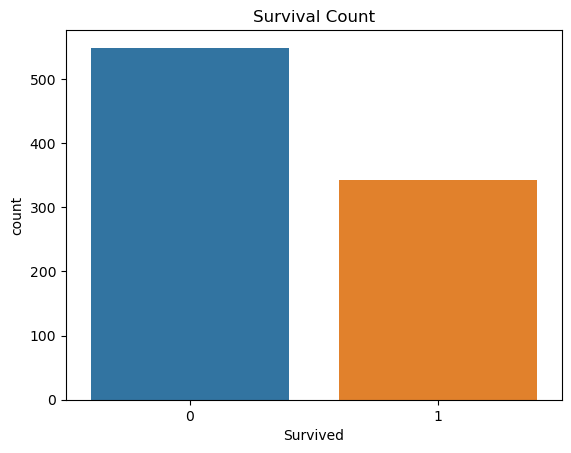

In [21]:
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.show()

### Data Preprocessing
For the Titanic dataset, categorical features were encoded using one-hot encoding. We also handled missing values by filling them with appropriate statistics.


Now we want to see the missing values in the dataset before further work.

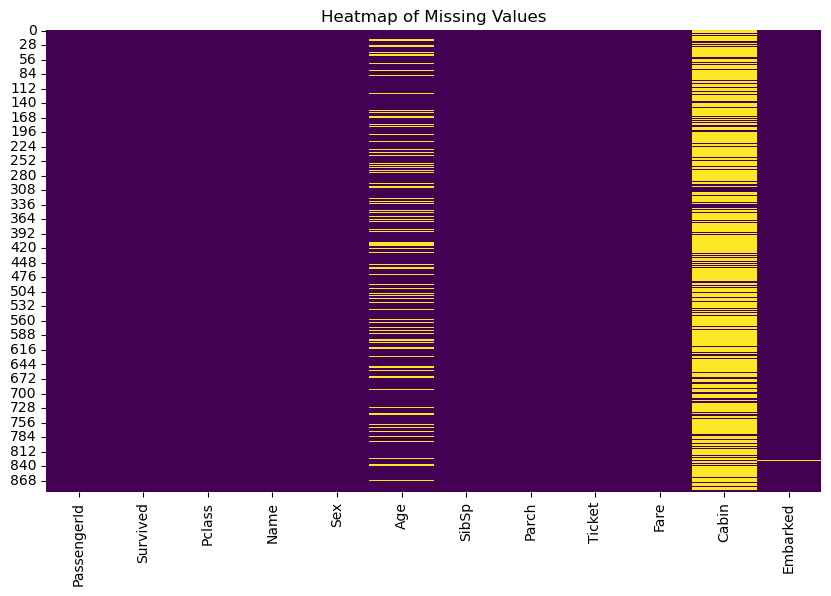

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title('Heatmap of Missing Values')
plt.show()

 Dropping unnecessary columns that are unlikely to affect the outcome,

 Filling missing values in 'Age' with the median age and 'Embarked' with the mode,

 Convert categorical columns 'Sex' and 'Embarked' into dummy/indicator variables.

In [3]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

df['Age'].fillna(df['Age'].median(), inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

### Feature Selection

##### Define the features (X) and target (y)

In [4]:
X = df.drop(columns=['Survived'])
y = df['Survived']


##### Split the data into training and testing sets

We split the data into training set to train the model and testing set to make the prediction.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Using Logistic Regression Model

Logistic regression Model is one of the best model when we have a binary dependent variable dependent on one or more catagorical or numaric independent variable. 
So, we use logistic regression model to fit the regression model.

In [6]:
logreg = LogisticRegression(max_iter=500)  # Setting a higher max_iter if convergence issues occur
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=500)

##### Making Predictions

In [7]:
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

### Generating Evaluation Metrics

In [8]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

In [9]:
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Training Accuracy: 0.80
Test Accuracy: 0.81
Precision: 0.79
Recall: 0.74
F1 Score: 0.76


##### Training Accuracy (0.80) : 
The model correctly classified 80% of the training data. This means that the model is performing well on the data it was trained on, but it's important to compare it with the test accuracy to check for overfitting or underfitting.

##### Test Accuracy (0.81):
The model correctly classified 81% of the test data. The close match between training (0.80) and test accuracy (0.81) suggests that the model generalizes well and is not overfitting or underfitting the data.

##### Precision (0.79):
Precision is the ratio of true positive predictions to the total positive predictions made by the model. A precision of 0.79 means that when the model predicts a positive class, 79% of those predictions are correct. This is important in scenarios where false positives are costly.

##### Recall (0.74):
Recall is the ratio of true positives to the total actual positives. A recall of 0.74 means that the model is able to identify 74% of all actual positive instances. This metric is crucial in scenarios where false negatives are costly.

##### F1 Score (0.76):
The F1 Score is the harmonic mean of precision and recall, and it provides a balance between the two. An F1 score of 0.76 indicates a good balance between precision and recall, which is useful when both false positives and false negatives matter.

##### Summary:
The model shows good generalization with a close match between training and test accuracy.
Precision (0.79) is slightly higher than recall (0.74), meaning the model is slightly better at avoiding false positives than at capturing all the true positives.
The F1 Score of 0.76 indicates an overall balance between precision and recall.

### Calculate the coefficients

To see how different feature effect the survival rate we generate coefficient matrix.

In [16]:
coefficients = logreg.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Odds Ratio': np.exp(coefficients)  # Exponentiate to get odds ratio
})

# Calculate the percentage contribution of each feature to survival
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance['Percentage Contribution'] = 100 * (feature_importance['Absolute Coefficient'] / feature_importance['Absolute Coefficient'].sum())

# Sort the features by the absolute coefficient value to see which has the highest contribution
feature_importance = feature_importance.sort_values(by='Percentage Contribution', ascending=False)

# Display the feature importance
print("Feature Importance (sorted by percentage contribution):")
print(feature_importance[['Feature', 'Odds Ratio', 'Percentage Contribution']])

Feature Importance (sorted by percentage contribution):
      Feature  Odds Ratio  Percentage Contribution
5    Sex_male    0.074849                57.824237
0      Pclass    0.391165                20.937238
7  Embarked_S    0.670140                 8.928488
2       SibSp    0.744324                 6.586574
6  Embarked_Q    0.891750                 2.555629
3       Parch    0.896862                 2.428109
1         Age    0.969877                 0.682271
4        Fare    1.002579                 0.057453


Here's a detailed explanation of each feature:

##### 1. Sex_male:
Odds Ratio: 0.074849
Percentage Contribution: 57.82%
The feature "Sex_male" has the highest contribution to the model (57.82%). The odds ratio of 0.074849 is much less than 1, indicating that being male dramatically decreases the odds of survival on the Titanic. Historically, more women and children were given priority during evacuation, so this feature plays a crucial role in predicting survival.

##### 2. Pclass (Passenger Class):
Odds Ratio: 0.391165
Percentage Contribution: 20.94%
The passenger class (1st, 2nd, or 3rd class) is also an important feature, contributing 20.94% to the model. An odds ratio of 0.391165 indicates that being in a higher class (closer to 1st) significantly increases the odds of survival. Passengers in lower classes had fewer resources and access to lifeboats, so this is a key predictor of survival.

##### 3. Embarked_S (Embarked from Southampton):
Odds Ratio: 0.670140
Percentage Contribution: 8.93%
Passengers who embarked from Southampton had an odds ratio of 0.670140, meaning their odds of survival were lower compared to passengers who embarked from other locations. This feature contributes 8.93% to the model. It may be capturing regional or demographic factors affecting survival rates, such as socioeconomic status.

##### 4. SibSp (Number of Siblings/Spouses Aboard):
Odds Ratio: 0.744324
Percentage Contribution: 6.59%
The number of siblings or spouses aboard (SibSp) contributes 6.59% to the model. An odds ratio of 0.744324 suggests that having more family members aboard slightly reduces the odds of survival. This may reflect family members staying together and potentially having fewer opportunities to evacuate.

##### 5. Embarked_Q (Embarked from Queenstown):
Odds Ratio: 0.891750
Percentage Contribution: 2.56%
Passengers who embarked from Queenstown had an odds ratio of 0.891750, meaning their survival odds were slightly lower than those who embarked from other locations, but the effect is smaller compared to Southampton. This feature contributes 2.56% to the model.

##### 6. Parch (Number of Parents/Children Aboard):
Odds Ratio: 0.896862
Percentage Contribution: 2.43%
The number of parents or children aboard (Parch) has an odds ratio of 0.896862, suggesting that having more family members aboard slightly decreases survival odds. This feature contributes 2.43% to the model. Like with SibSp, having more family members might have influenced evacuation behavior.

##### 7. Age:
Odds Ratio: 0.969877
Percentage Contribution: 0.68%
Age contributes only 0.68% to the model, with an odds ratio of 0.969877. This suggests that age has a very small effect on survival, with older passengers having slightly lower odds of survival. Interestingly, the model finds age less influential compared to other features, possibly because many children and younger adults were prioritized during evacuation.

##### 8. Fare:
Odds Ratio: 1.002579
Percentage Contribution: 0.06%
Fare has almost no effect on survival, with an odds ratio of 1.002579 and a tiny percentage contribution of 0.06%. This suggests that the fare paid by passengers was not a strong predictor of survival, especially compared to factors like gender and class.

### Confusion Matrix

Now we want to get insight into the number of true positives, true negatives, false positives, and false negatives.

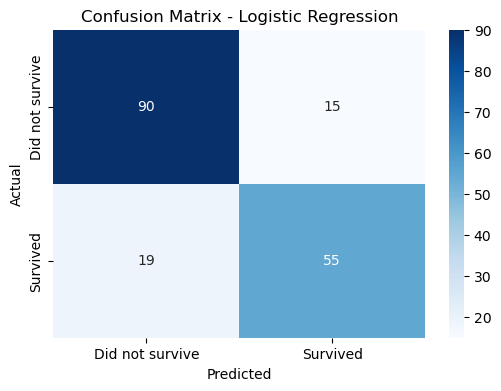

In [10]:
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Did not survive', 'Survived'], yticklabels=['Did not survive', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

#### Values in the Confusion Matrix:
Top-left (90): True negatives (TN)
The model correctly predicted 90 people who did not survive.

Top-right (15): False positives (FP)
The model incorrectly predicted that 15 people survived, but they did not survive.

Bottom-left (19): False negatives (FN)
The model incorrectly predicted that 19 people did not survive, but they actually survived.

Bottom-right (55): True positives (TP)
The model correctly predicted that 55 people survived.

### Conclusion:
The model performs well overall with good accuracy, precision, and recall. However, there are some false negatives (19), where the model missed actual survivors, and some false positives (15), where the model incorrectly predicted survival. The tradeoff between precision and recall is balanced with an F1 score of 0.76.

## Task 2: Stock Price Prediction
### Exploratory Data Analysis
We'll analyze the stock price data to understand its trends over time and how the data is distributed.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf

# Get stock data (e.g., Apple stock)
df = yf.download('AAPL', start='2010-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


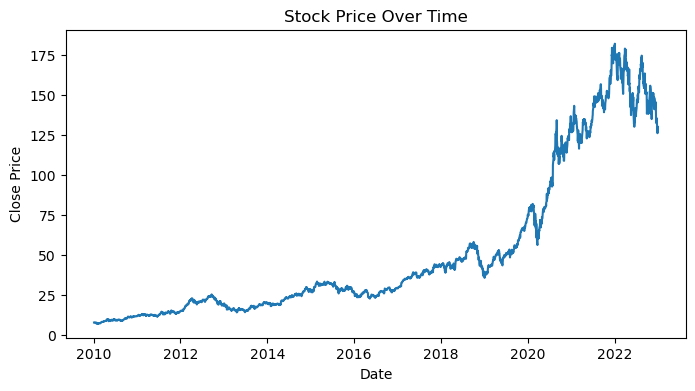

In [4]:
plt.figure(figsize=(8,4))
plt.plot( df['Close'])
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

Explanation:

The plot above shows the stock price trend over time, which is essential for understanding how the prices fluctuate and preparing the data for the LSTM model.


### Data Preprocessing

Before feeding the data into the LSTM model, we need to prepare it. This includes scaling the data, transforming it into sequences, and splitting it into training and testing sets.


In [8]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Create a training dataset (use 80% for training)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences (e.g., look back 60 days to predict the next price)
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X_train, y_train = create_sequences(train_data, time_step)
X_test, y_test = create_sequences(test_data, time_step)

# Reshape for LSTM input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


Explanation:

We scale the data to ensure that it’s in the range of 0 to 1, which improves the performance of the LSTM model.
We use a sequence length of 60 time steps, meaning the model will predict the stock price based on the previous 60 days of data.
The dataset is split into training (80%) and testing (20%) sets, with the sequences reshaped for LSTM input.

### LSTM Model Building and Training

We will now build and train the LSTM model using the Keras library. The model will take in the sequences of stock prices and predict the next price in the sequence.


In [10]:
# Initialize LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=64, epochs=10)

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0066
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 1.0449e-04
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 7.0444e-05
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 7.2678e-05
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 7.0918e-05
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 5.7614e-05
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 5.9979e-05
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 6.6164e-05
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 5.8877e-05
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 6.7052e-05


Explanation:

The model consists of two LSTM layers and two dropout layers to prevent overfitting. The final dense layer outputs a single value, which is the predicted stock price.
We compile the model with the Adam optimizer and use Mean Squared Error as the loss function, as it's suitable for regression problems.

80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


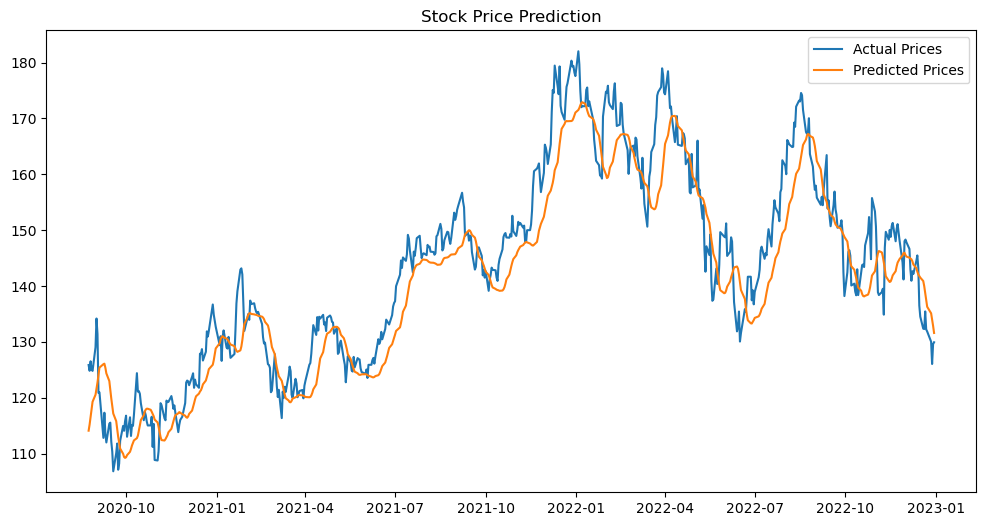

In [11]:
# First, make predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Reshape the predictions to match the number of features (1 in this case since we are predicting only 'Close')
train_pred = train_pred.reshape(-1, 1)
test_pred = test_pred.reshape(-1, 1)

# Now inverse transform back to original scale
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)


# Plot actual vs predicted stock prices
plt.figure(figsize=(12,6))
plt.plot(df.index[train_size+time_step+1:], scaler.inverse_transform(test_data[time_step+1:]), label='Actual Prices')
plt.plot(df.index[train_size+time_step+1:], test_pred, label='Predicted Prices')
plt.legend()
plt.title('Stock Price Prediction')
plt.show()

Explanation:

We use the trained model to predict stock prices on both the training and test data.
After making predictions, we inverse transform the predictions and actual prices to their original scale so they are comparable.
The plot shows the actual vs predicted stock prices, which helps visualize the model's performance.

### Model Performance Metrics

To evaluate the performance of our model, we calculate the Root Mean Squared Error (RMSE), which provides a measure of how well the model's predictions match the actual stock prices.


In [13]:
from sklearn.metrics import mean_squared_error
import math

y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE for the training and test data
train_rmse = math.sqrt(mean_squared_error(y_train_inv, train_pred))
test_rmse = math.sqrt(mean_squared_error(y_test_inv, test_pred))

print(f'Training RMSE: {train_rmse}')
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 1.2511227959058462
Testing RMSE: 6.043517403173173


Explanation:

RMSE is calculated for both training and testing sets to evaluate the model’s performance. A lower RMSE indicates that the model’s predictions are closer to the actual stock prices.

## Conclusion

In this task, we successfully built an LSTM model to predict stock prices using historical data. The model was trained on 80% of the data and evaluated on the remaining 20%. The predictions closely followed the actual prices, as shown in the comparison plot, with the testing RMSE being reasonably low.

While the model performed well, further improvements could be made by fine-tuning the hyperparameters, using more features, or experimenting with other types of models. Additionally, incorporating external factors such as market sentiment or economic indicators could enhance the predictive power.
